In [10]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

On average, traders who use the Moving Average strategy typically rely on at least two moving averages with different window sizes. So now we are going to replicate that crossover strategy and test if we can get better results. The strategy is simple: When the fast moving average crosses over (under) the slow one, we get a signal to enter (exit) a position. 

NOTE: We are working in a daily timeframe. The quicker the timefrfame the less data is to work with. If it doesn't work in a big timeframe (hourly, daily, monthly) it is very possible that it won't work in a lower timeframe.

C:\Users\Ferna\AppData\Local\Temp\ipykernel_22736\1188099633.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER)
HTTP Error 404: 
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['EURUSD']: YFTzMissingError('possibly delisted; no timezone found')


Price,Adj Close,Close,High,Low,Open,Volume,10_ma,27_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,,


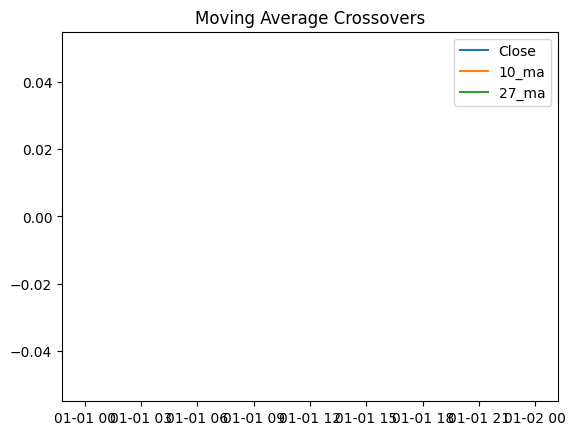

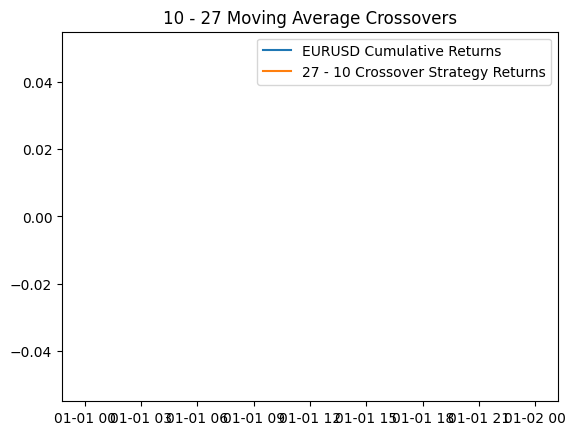

In [11]:
TICKER = 'EURUSD'
FAST = 10
SLOW = 27
LOOKBACK = 10000

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)

    return df.iloc[-LOOKBACK:,:] #Take a piece of the last "LOOKBACK" rows

def add_moving_averages(df, fast, slow):
    df[f'{FAST}_ma'] = df['Close'].rolling(fast).mean()
    df[f'{SLOW}_ma'] = df['Close'].rolling(slow).mean()


    plt.plot(df['Close'])
    plt.plot(df[f'{FAST}_ma'])
    plt.plot(df[f'{SLOW}_ma'])

    plt.legend(['Close', f'{FAST}_ma', f'{SLOW}_ma'])
    plt.title('Moving Average Crossovers')
    return df.dropna()

def add_strategy(df, fast, slow):
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df, fast, slow, ticker):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1 # cumprod() = cumulative product, is to calculate cumulative returns
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    plt.figure() # Make sure we can see our second plot
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{ticker} Cumulative Returns', f'{slow} - {fast} Crossover Strategy Returns'])
    plt.title(f'{FAST} - {SLOW} Moving Average Crossovers')

    return df


df = get_data()
df = add_moving_averages(df, FAST, SLOW)
df = add_strategy(df, FAST, SLOW)
df = test_strategy(df, FAST, SLOW, TICKER)
df